In [2]:
import tensorflow as tf
help(tf)

Help on package tensorflow:

NAME
    tensorflow

DESCRIPTION
    # Copyright 2015 The TensorFlow Authors. All Rights Reserved.
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    # ==============================================================================

PACKAGE CONTENTS
    contrib (package)
    core (package)
    examples (package)
    python (package)
    tensorboard (package)
    tools (package)

SUBMODULES
    app
    compat
    errors
  

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [6]:
x = tf.Variable(3, name = "x")
y = tf.Variable(4, name = "y")
f = x * x * y + y + 2

In [7]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [8]:
sess.close()

In [9]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [10]:
print(result)

42


In [11]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    result = f.eval()

In [12]:
print(result)

42


In [13]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    print(x.eval())
    print(y.eval())
    result = sess.run(f, {x:3, y:4})

3
4


In [14]:
print(result)

42


In [15]:
a = np.random.randn()
a

-0.24395540229637727

In [19]:
def f(X):
    return 3*X + 4

In [26]:
N = 40
noise_level = 0.8
trainX = np.linspace(-4.0, 4.0, N)
np.random.shuffle(trainX)
trainY = f(trainX) + np.random.rand(N) * noise_level

learning_rate = 0.01
training_epochs = 1000
display_step = 50

#use tensorflow to implement linear regression

In [27]:
from sklearn.base import BaseEstimator

In [50]:
class LinearRegressionTF(BaseEstimator):
    def __init__(self, learning_rate, training_ecpochs, 
                 display_step, annotate=False):
        self.annotate = annotate
        self.sess = tf.Session()
        self.training_epochs = training_epochs
        self.learning_rate = learning_rate
        self.display_step = display_step
    
    def fit(self, trainX, trainY):
        N = trainX.shape[0]
        
        #########################################################3
        # start building a graph
        
        # define input tensor X and Y
        self.X = tf.placeholder("float")
        self.Y = tf.placeholder("float")
        
        # define the assignments tensor W and b
        # randomly picking up the values for them at the beginning
        self.W = tf.Variable(np.random.randn(), name="weight")
        self.b = tf.Variable(np.random.randn(), name="bias")
        
        # define the function tensor pred
        self.pred = tf.add(tf.multiply(self.X, self.W), self.b)
        
        ##########################################################
        cost = tf.reduce_sum(tf.pow(self.pred-self.Y, 2))/(2*N)
        
        optimizer = tf.train.GradientDescentOptimizer(
            self.learning_rate).minimize(cost)
        
        init = tf.global_variables_initializer()
        self.sess.run(init)
        
        if self.annotate:
            plt.plot(trainX, trainY, "ro", label="Original data")
            plt.plot(trainX, 
                     self.sess.run(self.W) * trainX + self.sess.run(self.b),
                    label="Fitted line")
            plt.legend()
            plt.title("This is where model starts to learn!!")
            plt.show()
            
        for epoch in range(self.training_epochs):
            for(x, y) in zip(trainX, trainY):
                self.sess.run(optimizer, feed_dict={self.X:x, self.Y: y})
         # cost is a function of pred and y
         # but as pred is a function of x and y so cost is a function of X and y
            if (epoch  + 1 ) % display_step == 0 :
                c = self.sess.run (cost, feed_dict={self.X : trainX,
                                               self.Y: trainY})
                print("Epoch:", 
                  "%4d" % (epoch + 1),
                  "cost=",
                  "{:.9f}".format(c),
                  "W=",
                  self.sess.run(self.W),
                  "b=",
                  self.sess.run(self.b))
        
        if self.annotate:
            plt.plot(trainX, trainY, "ro", label= "origianl data")
            plt.plot(trainX, 
                      self.sess.run(self.W)*trainX + self.sess.run(self.b),
                      label = "fitted line")
            plt.legend()
            plt.show()
            
        print("Optimization Finished")
        training_cost = self.sess.run(cost, 
                                      feed_dict={self.X:trainX, self.Y:trainY})
        
        print("trianing cost = " + str(training_cost),
             "W=",
             str(self.sess.run(self.W)),
             "b=",
             str(self.sess.run(self.b)),
             "\n")
    
    def predict(self, testX):
        prediction = self.sess.run(self.pred, feed_dict={self.X: testX})
        return prediction
    
    def score(self, testX, testY):
        result = self.predict(testY)
        return r2_score(testY, result)
        
        
        
        # feels that the core of tensorflow is
        # define tensors with name
        # run self.sess.run( function,  with assignments dictionary)

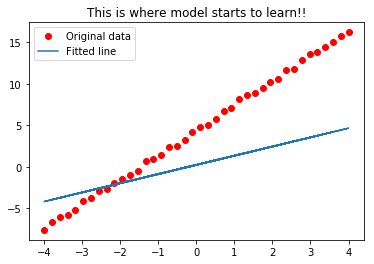

Epoch:   50 cost= 3.261534214 W= 2.8673372 b= 1.871668
Epoch:  100 cost= 1.200105906 W= 2.973357 b= 2.868298
Epoch:  150 cost= 0.455154121 W= 2.9796 b= 3.47255
Epoch:  200 cost= 0.181358099 W= 2.979884 b= 3.8388927
Epoch:  250 cost= 0.080710337 W= 2.9798439 b= 4.060998
Epoch:  300 cost= 0.043709248 W= 2.979804 b= 4.19566
Epoch:  350 cost= 0.030106504 W= 2.9797823 b= 4.2773
Epoch:  400 cost= 0.025104698 W= 2.9797664 b= 4.326798
Epoch:  450 cost= 0.023264766 W= 2.9797578 b= 4.3568177
Epoch:  500 cost= 0.022588313 W= 2.9797544 b= 4.375009
Epoch:  550 cost= 0.022339258 W= 2.9797516 b= 4.3860426
Epoch:  600 cost= 0.022247594 W= 2.9797487 b= 4.392726
Epoch:  650 cost= 0.022213714 W= 2.9797475 b= 4.396788
Epoch:  700 cost= 0.022201221 W= 2.979747 b= 4.399245
Epoch:  750 cost= 0.022196556 W= 2.9797506 b= 4.4007516
Epoch:  800 cost= 0.022194907 W= 2.9797418 b= 4.4016037
Epoch:  850 cost= 0.022194212 W= 2.9797447 b= 4.4021807
Epoch:  900 cost= 0.022193935 W= 2.9797482 b= 4.4025764
Epoch:  950 co

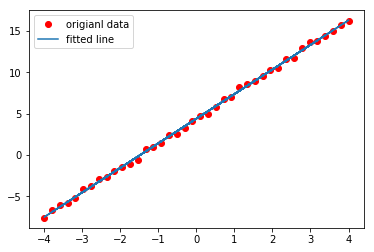

Optimization Finished
trianing cost = 0.022193829 W= 2.9797444 b= 4.4028263 



In [51]:
lr_model = LinearRegressionTF(learning_rate, 
                             1000,
                             display_step,
                             annotate = True)
lr_model.fit(trainX, trainY)

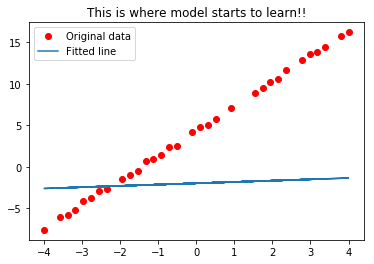

Epoch:   50 cost= 7.685240746 W= 2.751537 b= 0.4842798
Epoch:  100 cost= 2.818428040 W= 2.928752 b= 2.0152164
Epoch:  150 cost= 1.050522327 W= 2.9555938 b= 2.9459157
Epoch:  200 cost= 0.399591506 W= 2.9672234 b= 3.510776
Epoch:  250 cost= 0.159907386 W= 2.97401 b= 3.8535457
Epoch:  300 cost= 0.071654871 W= 2.978114 b= 4.061536
Epoch:  350 cost= 0.039158195 W= 2.980602 b= 4.18775
Epoch:  400 cost= 0.027193155 W= 2.9821124 b= 4.264334
Epoch:  450 cost= 0.022787301 W= 2.9830294 b= 4.3108087
Epoch:  500 cost= 0.021165017 W= 2.983582 b= 4.339011
Epoch:  550 cost= 0.020567778 W= 2.9839215 b= 4.3561244
Epoch:  600 cost= 0.020347858 W= 2.9841268 b= 4.3665123
Epoch:  650 cost= 0.020266905 W= 2.9842498 b= 4.372817
Epoch:  700 cost= 0.020237174 W= 2.9843266 b= 4.3766375
Epoch:  750 cost= 0.020226195 W= 2.9843712 b= 4.3789663
Epoch:  800 cost= 0.020222189 W= 2.984402 b= 4.3803763
Epoch:  850 cost= 0.020220775 W= 2.9844193 b= 4.3811984
Epoch:  900 cost= 0.020220198 W= 2.9844306 b= 4.3817525
Epoch: 

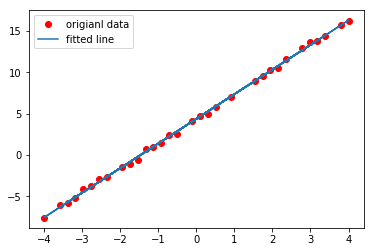

Optimization Finished
trianing cost = 0.020219922 W= 2.9844425 b= 4.382281 



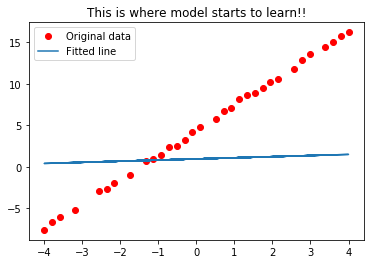

Epoch:   50 cost= 2.164143801 W= 2.8773162 b= 2.3787575
Epoch:  100 cost= 0.778482080 W= 3.0219283 b= 3.1795552
Epoch:  150 cost= 0.302064359 W= 3.0109992 b= 3.6627443
Epoch:  200 cost= 0.125358522 W= 2.997908 b= 3.956835
Epoch:  250 cost= 0.059756309 W= 2.989517 b= 4.1359935
Epoch:  300 cost= 0.035398319 W= 2.984377 b= 4.2451506
Epoch:  350 cost= 0.026352730 W= 2.981244 b= 4.3116617
Epoch:  400 cost= 0.022993561 W= 2.9793336 b= 4.352179
Epoch:  450 cost= 0.021745391 W= 2.9781694 b= 4.3768663
Epoch:  500 cost= 0.021281285 W= 2.9774601 b= 4.391911
Epoch:  550 cost= 0.021108599 W= 2.9770257 b= 4.4010763
Epoch:  600 cost= 0.021044293 W= 2.9767659 b= 4.406658
Epoch:  650 cost= 0.021020234 W= 2.9766083 b= 4.4100657
Epoch:  700 cost= 0.021011272 W= 2.9765098 b= 4.4121256
Epoch:  750 cost= 0.021007828 W= 2.976444 b= 4.413393
Epoch:  800 cost= 0.021006521 W= 2.9764142 b= 4.414169
Epoch:  850 cost= 0.021006038 W= 2.97639 b= 4.414642
Epoch:  900 cost= 0.021005813 W= 2.97637 b= 4.4149218
Epoch:  

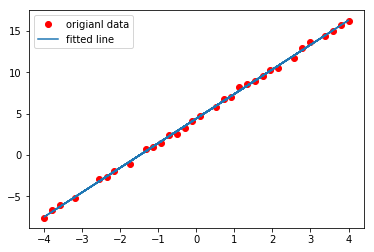

Optimization Finished
trianing cost = 0.021005724 W= 2.9763587 b= 4.415176 



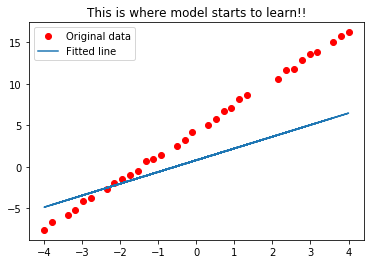

Epoch:   50 cost= 2.437917471 W= 2.878676 b= 2.1974876
Epoch:  100 cost= 0.904416800 W= 2.9702823 b= 3.0576637
Epoch:  150 cost= 0.348021746 W= 2.9810212 b= 3.5798604
Epoch:  200 cost= 0.143415749 W= 2.985003 b= 3.8965642
Epoch:  250 cost= 0.068165660 W= 2.9872801 b= 4.088625
Epoch:  300 cost= 0.040489677 W= 2.9886508 b= 4.205094
Epoch:  350 cost= 0.030310851 W= 2.9894793 b= 4.2757144
Epoch:  400 cost= 0.026565811 W= 2.9899838 b= 4.318544
Epoch:  450 cost= 0.025187615 W= 2.9902902 b= 4.3445196
Epoch:  500 cost= 0.024680316 W= 2.9904742 b= 4.3602724
Epoch:  550 cost= 0.024493475 W= 2.990586 b= 4.3698244
Epoch:  600 cost= 0.024424586 W= 2.9906542 b= 4.375617
Epoch:  650 cost= 0.024399169 W= 2.9906955 b= 4.379128
Epoch:  700 cost= 0.024389766 W= 2.9907215 b= 4.381253
Epoch:  750 cost= 0.024386242 W= 2.9907355 b= 4.3825483
Epoch:  800 cost= 0.024384901 W= 2.9907465 b= 4.3833437
Epoch:  850 cost= 0.024384424 W= 2.990751 b= 4.3838115
Epoch:  900 cost= 0.024384234 W= 2.9907498 b= 4.384072
Epo

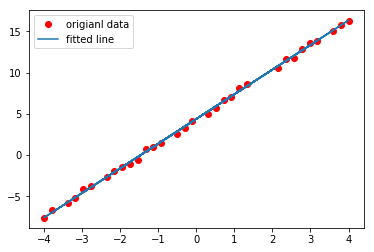

Optimization Finished
trianing cost = 0.024384152 W= 2.9907622 b= 4.384328 



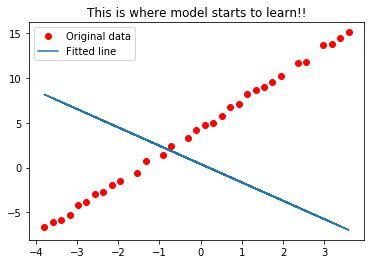

Epoch:   50 cost= 3.711640835 W= 2.4786534 b= 1.8669134
Epoch:  100 cost= 1.248667598 W= 2.8779752 b= 2.862168
Epoch:  150 cost= 0.475084722 W= 2.9321384 b= 3.475392
Epoch:  200 cost= 0.189686835 W= 2.9499443 b= 3.8490605
Epoch:  250 cost= 0.084065124 W= 2.959559 b= 4.0764313
Epoch:  300 cost= 0.044972673 W= 2.965312 b= 4.2147555
Epoch:  350 cost= 0.030503910 W= 2.9688022 b= 4.298898
Epoch:  400 cost= 0.025147224 W= 2.9709277 b= 4.3500915
Epoch:  450 cost= 0.023163937 W= 2.9722197 b= 4.381236
Epoch:  500 cost= 0.022429515 W= 2.9730055 b= 4.400181
Epoch:  550 cost= 0.022157446 W= 2.9734828 b= 4.411704
Epoch:  600 cost= 0.022056539 W= 2.9737747 b= 4.418716
Epoch:  650 cost= 0.022019077 W= 2.97395 b= 4.422983
Epoch:  700 cost= 0.022005197 W= 2.9740589 b= 4.4255657
Epoch:  750 cost= 0.022000000 W= 2.974125 b= 4.427139
Epoch:  800 cost= 0.021997990 W= 2.9741657 b= 4.428129
Epoch:  850 cost= 0.021997299 W= 2.9741886 b= 4.4286757
Epoch:  900 cost= 0.021997016 W= 2.9742029 b= 4.429048
Epoch:  

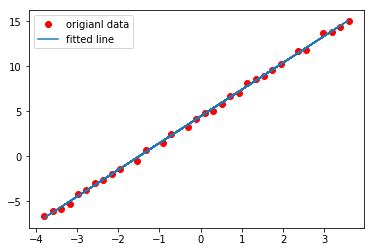

Optimization Finished
trianing cost = 0.021996852 W= 2.9742107 b= 4.4294133 



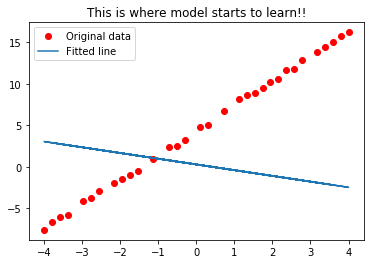

Epoch:   50 cost= 3.126509905 W= 2.852625 b= 1.943682
Epoch:  100 cost= 1.132398605 W= 2.9973807 b= 2.913127
Epoch:  150 cost= 0.430885077 W= 2.9920528 b= 3.499595
Epoch:  200 cost= 0.172527671 W= 2.9844909 b= 3.8554292
Epoch:  250 cost= 0.077354372 W= 2.9797013 b= 4.071384
Epoch:  300 cost= 0.042295136 W= 2.9767847 b= 4.2024355
Epoch:  350 cost= 0.029376604 W= 2.9750147 b= 4.281974
Epoch:  400 cost= 0.024615422 W= 2.9739368 b= 4.3302474
Epoch:  450 cost= 0.022860045 W= 2.9732869 b= 4.3595457
Epoch:  500 cost= 0.022212524 W= 2.9728901 b= 4.377327
Epoch:  550 cost= 0.021973489 W= 2.97265 b= 4.388114
Epoch:  600 cost= 0.021885050 W= 2.9725034 b= 4.3946633
Epoch:  650 cost= 0.021852229 W= 2.9724174 b= 4.398641
Epoch:  700 cost= 0.021840017 W= 2.9723606 b= 4.401052
Epoch:  750 cost= 0.021835433 W= 2.9723287 b= 4.402517
Epoch:  800 cost= 0.021833729 W= 2.9723094 b= 4.403397
Epoch:  850 cost= 0.021833017 W= 2.9722948 b= 4.4039397
Epoch:  900 cost= 0.021832746 W= 2.9722853 b= 4.404292
Epoch: 

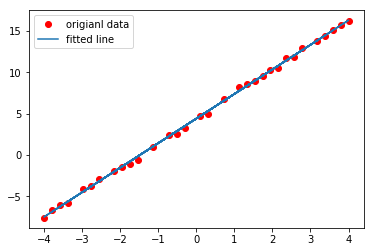

Optimization Finished
trianing cost = 0.021832634 W= 2.972297 b= 4.404551 



-6.824797464139555

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr_model, trainX, trainY, cv=5).mean()

#use tensorflow to implement logistic regression

In [53]:
tf.reset_default_graph()

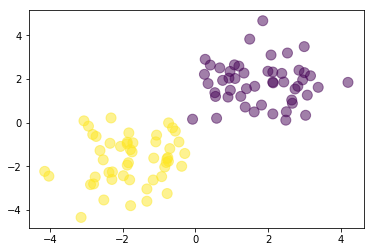

In [54]:
N = 100
D = 2
trainX = np.random.randn(N,D)

delta = 1.75
trainX[:N//2] += np.array([delta, delta])
trainX[N//2:] += np.array([-delta, -delta])  #linear seperable data set

# generate a one d array, with the first N//2 as 0, second N//2 as 1
trainY = np.array([0] * (N//2) + [1] * (N//2))
plt.scatter(trainX[:, 0], trainX[:,1], s = 100, c = trainY, alpha = 0.5)
plt.show()

In [55]:
original_label = np.array([0] * (N//2) + [1] * (N//2))

In [76]:
from sklearn.metrics import accuracy_score
class LogisticRegressionTF(BaseEstimator):    # inherit the BaseEstimator
    def __init__(self, learning_rate, training_epochs, display_step, annotate=False):
        self.sess = tf.Session()
        self.training_epochs = training_epochs
        self.learning_rate = learning_rate
        
        self.display_step = display_step
        self.annotate = annotate
        
    def fit( self, trainX, trainY):
        N, D = trainX.shape
        _, c = trainY.shape
        
        # build a graph
        # define the input
        self.X = tf.placeholder(tf.float64, shape=[None, D])
        self.Y = tf.placeholder(tf.float64, shape=[None, c])
        
        # define the assignemnts
        self.W = tf.Variable(np.random.randn(D,c), name = "weight")
        self.b = tf.Variable(np.random.randn(c), name = "bias")
        
        # build the function f tensor p1 = sigmoid(WX+b)
        output_logits = tf.add(tf.matmul(self.X, self.W), self.b)
        self.pred = tf.sigmoid(output_logits)
        
        # cost function
        # call the 
        # ??? why reduce mean ?
        cost = tf.reduce_mean(
            tf.nn.sigmoid_cross_entropy_with_logits(
                logits=output_logits, labels = self.Y))
        
        optimizer = tf.train.GradientDescentOptimizer(
            self.learning_rate).minimize(cost)
        
        init = tf.global_variables_initializer()
        self.sess.run(init)
        
        # 可视化初始化的模型边界
        if self.annotate:
            assert len(trainX.shape) == 2, "Only 2d points are allowed!!"

            plt.scatter(trainX[:,0], trainX[:,1], s=100, c=original_label, alpha=0.5) 

            h = .02 
            x_min, x_max = trainX[:, 0].min() - 1, trainX[:, 0].max() + 1
            y_min, y_max = trainX[:, 1].min() - 1, trainX[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

            Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
            plt.title("This is where model starts to learn!!")
            plt.show()
        
        # start training
        for epoch in range(self.training_epochs):
            for (x, y) in zip(trainX, trainY):
                self.sess.run(optimizer, 
                              feed_dict = {self.X: np.asmatrix(x),
                                           self.Y: np.asmatrix(y)})
                
            if (epoch+1) % display_step == 0:
                c = self.sess.run(cost, feed_dict={self.X: trainX, self.Y:trainY})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", self.sess.run(self.W), "b=", self.sess.run(self.b))
        
                if self.annotate:
                    assert len(trainX.shape) == 2, "Only 2d points are allowed!!"

                    plt.scatter(trainX[:,0], trainX[:,1], s=100, c=original_label, alpha=0.5) 
             
                    h = .02 
                    x_min, x_max = trainX[:, 0].min() - 1, trainX[:, 0].max() + 1
                    y_min, y_max = trainX[:, 1].min() - 1, trainX[:, 1].max() + 1
                    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

                    Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
                    Z = Z.reshape(xx.shape)
                    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
                    plt.show()
        print("Optiomization finished")
        training_cost = self.sess.run(cost, 
                                      feed_dict={self.X: trainX,
                                           self.Y: trainY})
        print("Training cost=", training_cost, "W=", self.sess.run(self.W), "b=", self.sess.run(self.b), '\n')


    def predict(self, testX):
        predictio = self.sess.run(self.pred, feed_dict={self.X: test})
        return np.argmax(prediction, axis = 1)
    
    def score(self, testX, testY):
        _, true_result = np.where(testY == 1)
        result = self.predict(testX)
        return accuracy_score(true_result, result)

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
le = OneHotEncoder()
le.fit(trainY.reshape(N, -1))
trainY = le.transform(trainY.reshape(N, -1)).toarray()

In [79]:
logisticTF = LogisticRegressionTF(learning_rate, 1000, display_step, annotate=False)
logisticTF.fit(trainX, trainY)

Epoch: 0050 cost= 0.185211072 W= [[ 0.61878979 -0.06627527 -1.3345135   1.39410876 -0.3127128   2.00758166
   1.57491563 -1.44520932 -0.89701807  0.78938473 -0.62218779 -0.07263491
   1.70864318 -0.09974167 -0.31299991  2.46252314  0.67540933  1.32578304
   2.43803001 -0.54856686  0.81479959 -0.85238095 -0.34695052  1.56578915
   0.9463715  -0.99804067 -1.37721359  0.88163037 -0.46637119  1.67629769
   0.37148086 -0.98189905]
 [ 0.33303691 -2.36271732 -0.7525539   0.26926889 -1.22571978 -0.55569618
  -0.2927742   0.10188607 -0.12780812  0.27820882  2.21197466 -1.31186813
  -0.15462363 -1.02753221 -0.87190418 -1.0529351  -1.85197344 -0.02710253
   0.58547524 -1.25395812  0.47315184 -0.52147742 -0.59821045  1.03903722
   0.34621872 -0.45284331  0.0131128   0.66755562 -0.35354803  0.24587929
   0.87074043 -0.79762762]] b= [ 0.23108677 -0.14010489  1.25436562  0.09059065  1.33001141 -0.01062537
 -0.06591978  1.13315046 -0.75104813  0.22935501  0.1235277  -0.43298432
 -0.7762467  -0.0958002